STA 141B Project - A comparison of an NBA player's on court preformance against the expectations of their contract

1. Introduction
2. Data Acquisiton 
3. Data Process 
4. Approach
5. Data Analysis 
5b. General statistics 
5c. Data Analysis real 
6. Reports + visualization
7. Dicussion 
8. 

1. Introduction
The National Basketball Association (NBA) is the premiere American basketball league comprised of 30 teams from the United States and Canada. The NBA is known for having lucrative contracts that costs tens of millions of dollars per year for top players. When signing these players onto these lucrative contracts, they are typically given more money when the player is expected to have a bigger impact onto the team's preformance. This study aims to analyze the relationship between NBA players' salaries and their performance metrics, identify patterns and anomalies, calculate a metric to determine players who are undervalued and overvalued, and assess the implications of these findings on team and the NBA's economics

2. Data acquisiton
To access the general statistics about certain players, we pulled from a public API package that pulls from the NBA website (https://github.com/swar/nba_api?tab=readme-ov-file), we will also webscrape information on team's salary cap online (https://www.spotrac.com/nba/cap/). We can successfully scrape the NBA team salary cap using the below code. 

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
# This code will allow us to find the cap space for the 24 season for all NBA teams
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', 1000) 

# URL of the page
url = 'https://www.spotrac.com/nba/cap/'

# Send a GET request to the page
response = requests.get(url)

# Parse the HTML content of the page
soup = BeautifulSoup(response.content, 'html.parser')

# Grab Table
table = soup.find('table', {'class': 'datatable'})

# Pandas dataframe conversion
df = pd.read_html(str(table))[0]

print(df)

    Rank                    Team   Win%  PlayersSigned  PlayersAvg Age     Total Cap    Cap Space* 1st ApronSpace 2nd ApronSpace Active CapAll Active CapTop 3     Dead Cap
0      1               Utah Jazz  0.438             15            24.4  $130,557,411    $5,463,589    $40,773,098            NaN  $128,711,817     $66,152,629   $1,845,594
1      2         Detroit Pistons  0.172             14            24.6  $135,598,371      $422,629    $35,247,629            NaN   $83,803,488     $42,031,943  $51,794,883
2      3           Orlando Magic  0.569             15            24.3  $139,355,784   $-3,334,784            NaN            NaN  $130,964,229     $47,450,000            -
3      4       San Antonio Spurs  0.215             15            22.7  $142,928,288   $-6,907,288    $29,416,585            NaN   $94,551,623     $44,260,680  $46,356,959
4      5       Charlotte Hornets  0.246             15            24.5  $143,055,717   $-7,034,717    $34,913,527            NaN   $97,074,9

C:\Users\bober\AppData\Local\Temp\ipykernel_10164\3423737245.py:24: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


As mentioned previously, we can also use the a public API called nba_api, which allows us to pull from the [NBA Website](https://www.nba.com/), which has publically available data on every player. Let's pull up up information on the current reigning MVP Joel Embiid of the philadelphia 76ers for his career statistics, current season statistics, and information on his contract with the 76ers currently. 

In [8]:
from nba_api.stats.static import players
from nba_api.stats.endpoints import playercareerstats, playergamelog

# Find player ID
player_dict = players.get_players()
embiid = [player for player in player_dict if player['full_name'] == 'Joel Embiid'][0]
embiid_id = embiid['id']

# Fetch career statistics
career_stats = playercareerstats.PlayerCareerStats(player_id=embiid_id)
career_df = career_stats.get_data_frames()[0]

# Fetch current season statistics
current_season_stats = playergamelog.PlayerGameLog(player_id=embiid_id, season='2023')
current_season_df = current_season_stats.get_data_frames()[0]

print("Joel Embiid's Career Statistics:")
print(career_df)

# Print current season statistics
print("\nJoel Embiid's Current Season Statistics:")
print(current_season_df)

Joel Embiid's Career Statistics:
   PLAYER_ID SEASON_ID LEAGUE_ID     TEAM_ID TEAM_ABBREVIATION  PLAYER_AGE  GP  GS     MIN  FGM   FGA  FG_PCT  FG3M  FG3A  FG3_PCT  FTM  FTA  FT_PCT  OREB  DREB  REB  AST  STL  BLK  TOV   PF   PTS
0     203954   2016-17        00  1610612755               PHI        23.0  31  31   786.0  200   429   0.466    36    98    0.367  191  244   0.783    61   182  243   66   27   76  117  112   627
1     203954   2017-18        00  1610612755               PHI        24.0  63  63  1912.0  510  1056   0.483    66   214    0.308  359  467   0.769   143   547  690  199   40  111  234  209  1445
2     203954   2018-19        00  1610612755               PHI        25.0  64  64  2154.0  580  1199   0.484    79   263    0.300  522  649   0.804   160   711  871  234   46  122  226  211  1761
3     203954   2019-20        00  1610612755               PHI        26.0  51  51  1506.0  382   801   0.477    57   172    0.331  351  435   0.807   141   452  593  152   45   6

5. Data Analysis
One of the general correlation approach we can use to see if how much money teams are spending affects how often they win is to compare their yearly cap space with their win percentage. 

                            OLS Regression Results                            
Dep. Variable:                   Win%   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     7.168
Date:                Tue, 12 Mar 2024   Prob (F-statistic):             0.0123
Time:                        00:10:22   Log-Likelihood:                 291.97
No. Observations:                  30   AIC:                            -579.9
Df Residuals:                      28   BIC:                            -577.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.448e-06   2.13e-05     -0.303      0.7

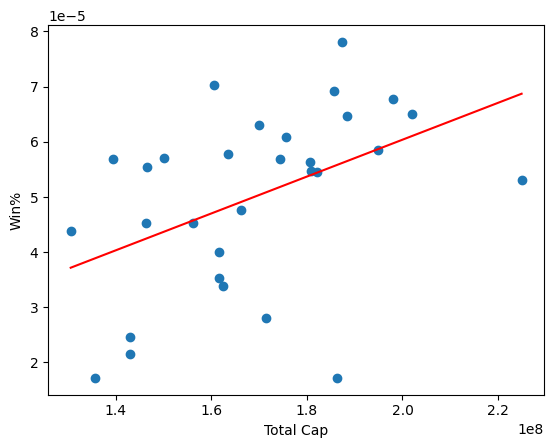

In [6]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming that "Win%" and "Total Cap" are columns in your dataframe
# Convert "Total Cap" to numeric, removing any non-numeric characters
df['Total Cap'] = df['Total Cap'].replace('[\$,]', '', regex=True).astype(float)

# Convert "Win%" to numeric, removing the '%' sign
df['Win%'] = df['Win%'].astype(str)
df['Win%'] = df['Win%'].str.rstrip('%').astype('float') / 100.0

# Define the dependent variable (y) and the independent variable (X)
y = df['Win%']
X = df['Total Cap']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Perform the regression
model = sm.OLS(y, X)
results = model.fit()

# Print out the statistics
print(results.summary())

plt.scatter(X['Total Cap'], y)
# Generate the prediction values along the line of best fit
y_pred = results.predict(X)
# Plot the regression line
plt.plot(X['Total Cap'], y_pred, color='red')
# Set the labels for the x and y axes
plt.xlabel('Total Cap')
plt.ylabel('Win%')
# Display the plot
plt.show()